In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import seaborn as sns
from sklearn import preprocessing, svm, neighbors
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
dataset = pd.read_csv(r'C:\Users\pc\Downloads\stroke.zip')

In [13]:
dataset.head(15)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


In [14]:
dataset.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
dataset.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [17]:
dataset = dataset.fillna(value=dataset.mean())

In [18]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1


In [19]:
dataset.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,False,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


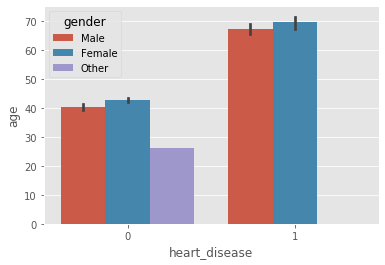

In [20]:
sns.barplot(x='heart_disease', y='age', hue='gender', data=dataset)
plt.show()

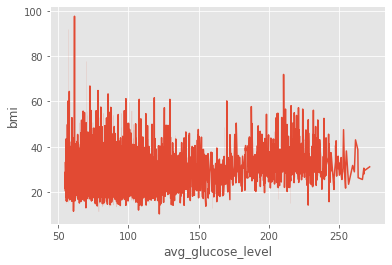

In [21]:
sns.lineplot(x = "avg_glucose_level", y = "bmi", data=dataset)
plt.show()

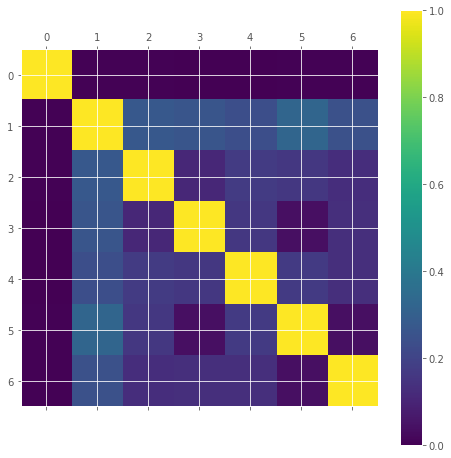

In [22]:
corr = dataset.corr()
figure = plt.figure(figsize=(8,8))
axes=figure.add_subplot(1,1,1)
caxes= axes.matshow(corr)
figure.colorbar(caxes)


In [23]:
corr = dataset.corr()

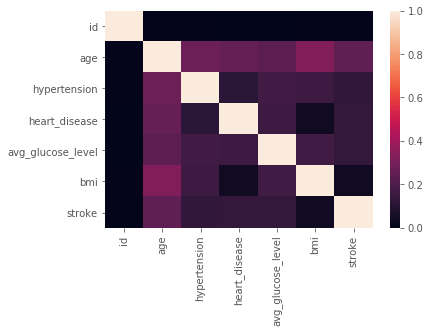

In [24]:
sns.heatmap(corr)

In [26]:
def handle_non_numeric_data(dataset):
    columns = dataset.columns.values
    for column in columns:
        text_digit_vals ={}
        
        def convert_to_int(val):
            return text_digit_vals[val]
        
        if dataset[column].dtype != np.int64 and dataset[column].dtype != np.float64: 
            column_contents = dataset[column].values.tolist()
            unique_elements = set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    x+=1
            dataset[column] = list(map(convert_to_int, dataset[column]))
            
    return dataset

dataset = handle_non_numeric_data(dataset)

dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,0,1,1,228.69,36.600000,1,1
1,51676,2,61.0,0,0,0,0,0,202.21,28.893237,0,1
2,31112,0,80.0,0,1,0,1,0,105.92,32.500000,0,1
3,60182,2,49.0,0,0,0,1,1,171.23,34.400000,3,1
4,1665,2,79.0,1,0,0,0,0,174.12,24.000000,0,1


In [29]:
columns_to_scale=(['id',
                  'age',
                  'avg_glucose_level',
                  'bmi'
                  ])


In [30]:
StandardScaler= StandardScaler()
dataset[columns_to_scale ] = StandardScaler.fit_transform(dataset[columns_to_scale]) 

In [31]:
dataset.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,-1.298312,0,1.051434,0,1,0,1,1,2.706375,1.001234e+00,1,1
1,0.716371,2,0.786070,0,0,0,0,0,2.121559,1.384666e-15,0,1
2,-0.255478,0,1.626390,0,1,0,1,0,-0.005028,4.685773e-01,0,1
3,1.118363,2,0.255342,0,0,0,1,1,1.437358,7.154182e-01,3,1
4,-1.647136,2,1.582163,1,0,0,0,0,1.501184,-6.357112e-01,0,1


In [32]:
X =dataset.drop(['stroke'], axis=1)
y = dataset[['stroke']]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=10)
model = LogisticRegression()
model.fit(X_train,y_train)
prediction = model.score(X_test,y_test)
print(prediction)                       

C:\Users\pc\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9383561643835616
